## Predict Food Time Delivery using Multilinear Regression

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

### #1 Import the dataset and set our variables

In [52]:
df = pd.read_csv("../Dataset/Food_Delivery_Times_Cleaned.csv")
X = df.drop(columns=['Delivery_Time_min'])
y = df['Delivery_Time_min']

### #2 Divide our data and train the model

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### #3 Make predictions

In [54]:
y_prediction = model.predict(X_test)

### #4 Visualize and compare our predictions

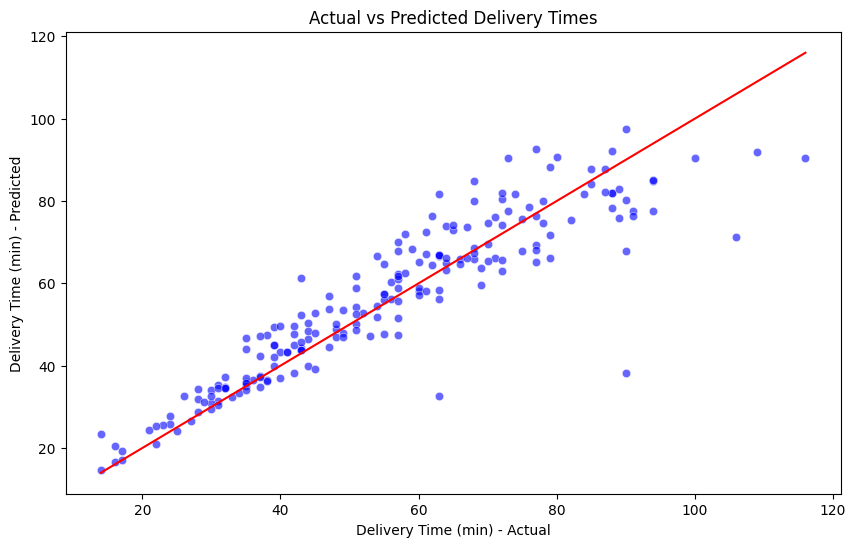

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_prediction, color = "blue", alpha= 0.6)
plt.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='solid')
plt.xlabel("Delivery Time (min) - Actual")
plt.ylabel("Delivery Time (min) - Predicted")
plt.title("Actual vs Predicted Delivery Times")
plt.show()

### #5 Calculate MAE and RMSE error and visualize it

Mean Absolute Error (MAE): 5.82 minutes
Root Mean Squared Error (MSE): 8.59 minutes


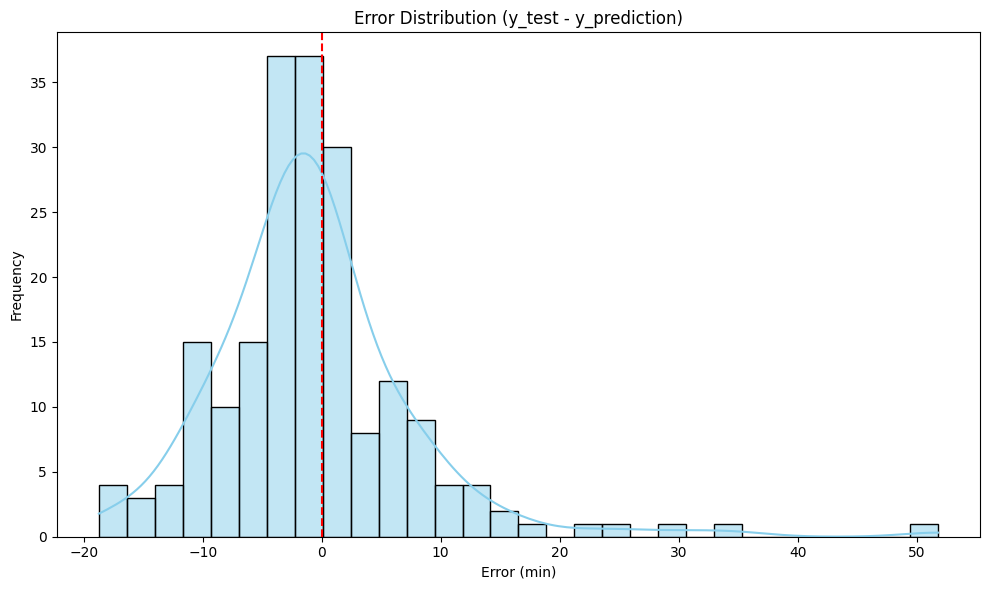

In [ ]:
mae = mean_absolute_error(y_test, y_prediction)
rmse = np.sqrt( mean_squared_error(y_test, y_prediction))
print(f"Mean Absolute Error (MAE): {mae:.2f} minutes")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} minutes")

residuals = y_test - y_prediction

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='skyblue', bins=30)
plt.title("Error Distribution (y_test - y_prediction)")
plt.xlabel("Error (min)")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')  
plt.tight_layout()
plt.show()

### #6 Which features has influenced the most in the prediction

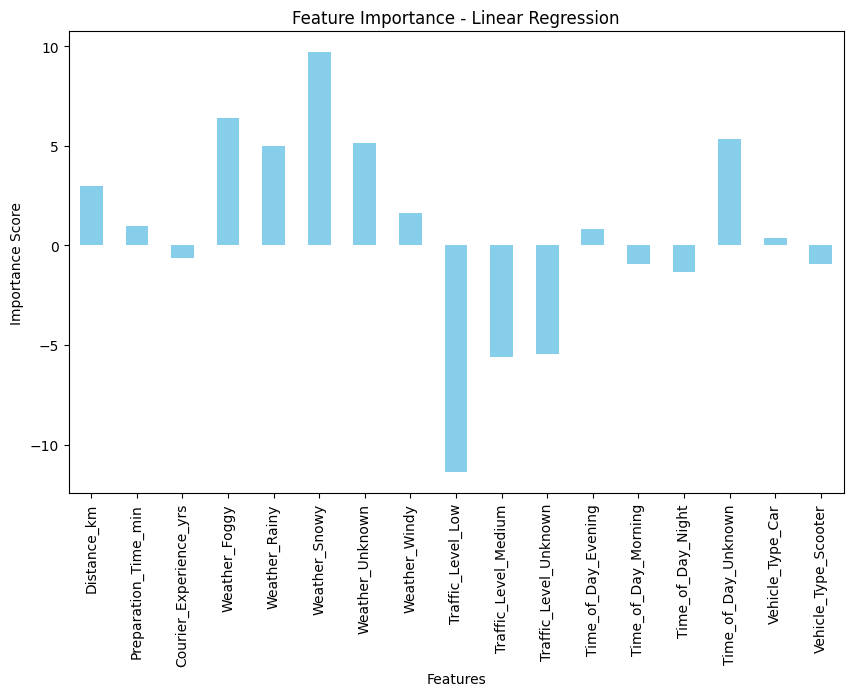

In [57]:
feature_importance = pd.Series(model.coef_, index=X.columns)
feature_importance.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance - Linear Regression')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()